In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

1.  Đọc dữ liệu lên dataframe

In [23]:
thietbi = pd.read_csv('thietbi.csv')
nguoidung_thietbi = pd.read_csv('nguoidung_thietbi.csv')
nguoidung_sudung = pd.read_csv('nguoidung_sudung.csv')


In [24]:
thietbi

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
...,...,...,...,...
14541,pendo,PNDPP44QC10,PNDPP44QC10,PNDPP44QC10
14542,pendo,PNDPP44QC7,PNDPP44QC7,PNDPP44QC7
14543,sugar_aums,QPOINT,QPI-1,QPI-1
14544,tecmobile,OmnisOne,OmnisOne,Omnis One


In [25]:
nguoidung_thietbi

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1
...,...,...,...,...,...,...
267,23049,29725,android,6.0,SM-G900F,1
268,23050,29726,ios,10.2,"iPhone7,2",3
269,23051,29726,ios,10.2,"iPhone7,2",3
270,23052,29727,ios,10.1,"iPhone8,4",3


In [26]:
nguoidung_sudung

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792
...,...,...,...,...
235,260.66,68.44,896.96,25008
236,97.12,36.50,2815.00,25040
237,355.93,12.37,6828.09,25046
238,632.06,120.46,1453.16,25058


2.  Vẽ mô hình quan hệ (ERD) từ bảng dữ liệu trên

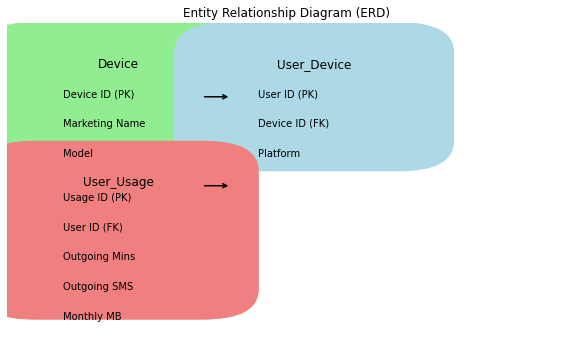

In [27]:
# Tạo sơ đồ ERD
fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ bảng thiết bị
device_box = mpatches.FancyBboxPatch((0.05, 0.6), 0.3, 0.3, boxstyle="round,pad=0.1", color="lightgreen")
ax.add_patch(device_box)
ax.text(0.2, 0.85, 'Device', fontsize=12, ha='center')
ax.text(0.1, 0.75, 'Device ID (PK)', fontsize=10, ha='left')
ax.text(0.1, 0.65, 'Marketing Name', fontsize=10, ha='left')
ax.text(0.1, 0.55, 'Model', fontsize=10, ha='left')

# Vẽ bảng người dùng thiết bị
user_device_box = mpatches.FancyBboxPatch((0.4, 0.6), 0.3, 0.3, boxstyle="round,pad=0.1", color="lightblue")
ax.add_patch(user_device_box)
ax.text(0.55, 0.85, 'User_Device', fontsize=12, ha='center')
ax.text(0.45, 0.75, 'User ID (PK)', fontsize=10, ha='left')
ax.text(0.45, 0.65, 'Device ID (FK)', fontsize=10, ha='left')
ax.text(0.45, 0.55, 'Platform', fontsize=10, ha='left')

# Vẽ bảng người dùng sử dụng
user_usage_box = mpatches.FancyBboxPatch((0.05, 0.1), 0.3, 0.4, boxstyle="round,pad=0.1", color="lightcoral")
ax.add_patch(user_usage_box)
ax.text(0.2, 0.45, 'User_Usage', fontsize=12, ha='center')
ax.text(0.1, 0.4, 'Usage ID (PK)', fontsize=10, ha='left')
ax.text(0.1, 0.3, 'User ID (FK)', fontsize=10, ha='left')
ax.text(0.1, 0.2, 'Outgoing Mins', fontsize=10, ha='left')
ax.text(0.1, 0.1, 'Outgoing SMS', fontsize=10, ha='left')
ax.text(0.1, 0, 'Monthly MB', fontsize=10, ha='left')

# Thiết lập mối quan hệ
ax.annotate('', xy=(0.4, 0.75), xytext=(0.35, 0.75),
             arrowprops=dict(arrowstyle='->', lw=1.5))
ax.annotate('', xy=(0.4, 0.45), xytext=(0.35, 0.45),
             arrowprops=dict(arrowstyle='->', lw=1.5))

# Thiết lập trục và hiển thị
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1)
ax.axis('off')  # Tắt trục
plt.title('Entity Relationship Diagram (ERD)')
plt.show()

3.  Đổi tên các cột dữ liệu cần thiết

In [28]:
thietbi.rename(columns= {'Retail Branding': 'Branding', 
                          'Marketing Name': 'MarketingName'}, inplace= True)


4.  Trộn bảng nguoidung_sudung và nguoidung_thietbi thông qua inner join để được bảng 
kết quả có các cột sau: [outgoing_mins_per_month, outgoing_sms_per_month, 
monthly_mb, use_id, platform, device]

In [29]:
dfKetQua = pd.merge(nguoidung_sudung,
                    nguoidung_thietbi[['use_id','platform','device']],
                    on='use_id')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


- nguoidung_sudung: Đây là DataFrame đầu tiên bạn muốn hợp nhất. Giả sử nó chứa thông tin người dùng và có cột use_id mà bạn muốn dùng làm khóa.
#
- nguoidung_thietbi[['use_id','platform','device']]: Đây là DataFrame thứ hai bạn muốn hợp nhất, nhưng chỉ lấy ba cột: use_id, platform, và device.
#
- Việc chỉ định [['use_id','platform','device']] có nghĩa là bạn chỉ quan tâm đến những cột này và sẽ không cần những cột khác trong nguoidung_thietbi.
#
- on='use_id': Đây là khóa mà bạn sẽ dùng để hợp nhất hai DataFrame. Hệ thống sẽ tìm các giá trị giống nhau trong cột use_id của cả hai DataFrame để thực hiện hợp nhất.

Left join

In [30]:
dfKetQua = pd.merge(nguoidung_sudung,
                    nguoidung_thietbi[['use_id','platform','device']],
                    on= 'use_id', how='left')
dfKetQua

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F
...,...,...,...,...,...,...
235,260.66,68.44,896.96,25008,NaN,NaN
236,97.12,36.50,2815.00,25040,NaN,NaN
237,355.93,12.37,6828.09,25046,NaN,NaN
238,632.06,120.46,1453.16,25058,NaN,NaN


5.  Tiếp tục inner-join bảng thietbi và dfKetQua để có thêm 2 cột Model và Branding trong 
bảng kết quả cuối cùng. Lưu ý ở đây khóa liên kết sẽ khác tên

Inner-join

In [31]:
dfKetQua = pd.merge(dfKetQua,
                    thietbi[['Branding','Model']],
                    left_on= 'device',
                    right_on= 'Model')
dfKetQua.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


dfKetQua: Đây là DataFrame đầu tiên bạn muốn hợp nhất, chứa thông tin người dùng đã được hợp nhất từ bước trước.

thietBi[['Branding','Model']]: Đây là DataFrame thứ hai mà bạn muốn hợp nhất, nhưng chỉ lấy hai cột: Branding và Model. Việc chỉ định cột giúp giữ cho DataFrame nhỏ gọn và chỉ chứa thông tin cần thiết.

left_on='device': Đây là cột trong dfKetQua mà bạn sẽ sử dụng để hợp nhất. Bạn muốn kết hợp dựa trên giá trị trong cột device.

right_on='Model': Đây là cột trong thietBi mà bạn sẽ sử dụng để hợp nhất. Bạn muốn kết hợp dựa trên giá trị trong cột Model.

Left-join

In [32]:
# left_join
dfKetQuaCuoi = pd.merge(dfKetQua,
                        thietbi[['Branding', 'Model']],
                        left_on='device',
                        right_on='Model', how='left')
print(dfKetQuaCuoi.head(5))

   outgoing_mins_per_month  outgoing_sms_per_month  monthly_mb  use_id  \
0                    21.97                    4.82     1557.33   22787   
1                    69.80                   14.70    25955.55   22801   
2                   249.26                  253.22     1557.33   22875   
3                   249.26                  253.22     1557.33   22876   
4                    83.46                  114.06     3114.67   22880   

  platform    device Branding_x   Model_x Branding_y   Model_y  
0  android  GT-I9505    Samsung  GT-I9505    Samsung  GT-I9505  
1  android  GT-I9505    Samsung  GT-I9505    Samsung  GT-I9505  
2  android  GT-I9505    Samsung  GT-I9505    Samsung  GT-I9505  
3  android  GT-I9505    Samsung  GT-I9505    Samsung  GT-I9505  
4  android  GT-I9505    Samsung  GT-I9505    Samsung  GT-I9505  


6.  Hãy liệt kê 5 dòng đầu tiên các mẫu thiết bị (cột device) bắt đầu bằng GT

In [33]:
# 6
dfKetQua[dfKetQua.device.str.startswith('GT')].head(5)
# contains('GT')]: ở giữa 
# endswith: o cuoi

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


7.  Hãy thống kê trung bình số phút hàng tháng, trung bình sms và trung bình data, số lượng 
sử dụng của các nhãn hàng

In [34]:
dfKetQua.groupby('Branding').agg({
    'outgoing_mins_per_month' : 'mean',
    'outgoing_sms_per_month' : 'mean',
    'monthly_mb' : 'mean',
    'use_id': 'count'
})
dfKetQua

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,Branding,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505
...,...,...,...,...,...,...,...,...
196,22.85,34.54,6577.12,23029,android,HTC One_M8,HTC,HTC One_M8
197,180.18,17.49,2076.45,23039,android,SM-G531F,Samsung,SM-G531F
198,12.85,58.32,74.40,23040,android,HTC Desire 620,HTC,HTC Desire 620
199,42.75,46.83,5191.12,23053,android,Vodafone Smart ultra 6,Vodafone,Vodafone Smart ultra 6


8.  Trực quan số lượng người dùng các nhãn hàng

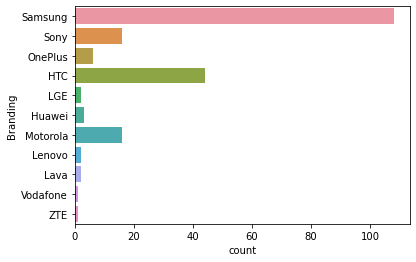

In [35]:
sns.countplot(y='Branding', data=dfKetQua)
plt.show()

In [36]:
dfKetQua['Branding'].value_counts()

Samsung     108
HTC          44
Motorola     16
Sony         16
OnePlus       6
Huawei        3
LGE           2
Lava          2
Lenovo        2
Vodafone      1
ZTE           1
Name: Branding, dtype: int64

9.  Trực quan hóa dữ liệu trung bình phút gọi, trung bình sms và dung lượng sử dụng trên 
từng nhóm nhãn hàng bán lẻ

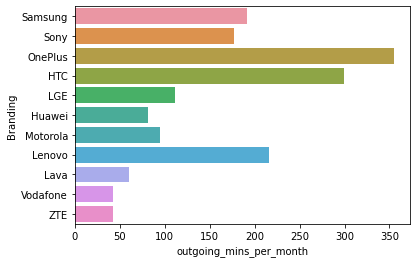

In [ ]:
sns.barplot(y='Branding', x='outgoing_mins_per_month', estimator=np.mean, data=dfKetQua, orient='horizontal', ci=None)
plt.show()

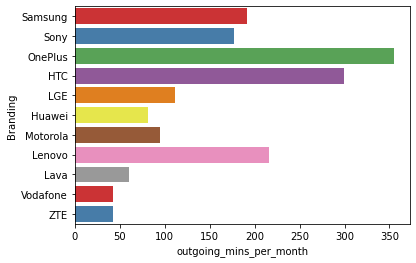

In [43]:
# Trung bình phút gọi
sns.barplot(x='outgoing_mins_per_month', y='Branding', data= dfKetQua, palette='Set1', ci = None)
plt.show()

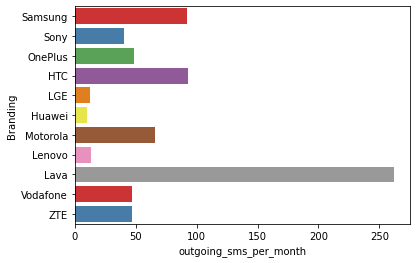

In [44]:
# Trung bình sms
sns.barplot(x='outgoing_sms_per_month',
            y='Branding',
            data= dfKetQua,
            palette='Set1',
            ci = None)
plt.show()

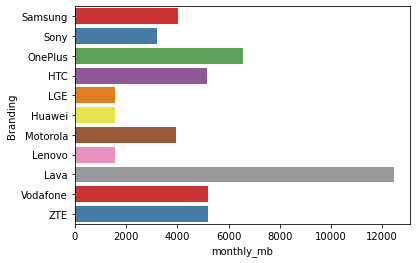

In [45]:
# dung lượng sử dụng trên từng nhóm nhãn hàng bán lẻ
sns.barplot(x='monthly_mb',
            y='Branding',
            data= dfKetQua,
            palette='Set1',
            ci = None)
plt.show()

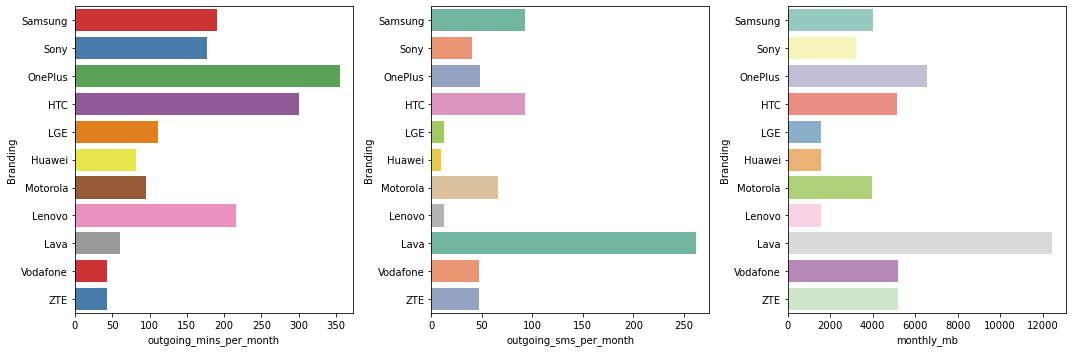

In [46]:
# Đưa ba bảng vào chung
fig, axes =plt.subplots(1,3, figsize=(15,5))
#  trung bình phút gọi,
sns.barplot(x='outgoing_mins_per_month',
            y='Branding',
            data= dfKetQua,
            palette='Set1',
            ci= None,
            ax= axes[0])
# trung bình sms
sns.barplot(x='outgoing_sms_per_month',
            y='Branding',
            data= dfKetQua,
            palette='Set2',
            ci= None,
            ax= axes[1])
# trung bình dung lượng sử dụng trên từng nhóm nhãn hàng bán lẻ
sns.barplot(x='monthly_mb',
            y='Branding',
            data= dfKetQua,
            palette='Set3',
            ci= None,
            ax= axes[2])
# canh khoảng cách giữ các bảng
plt.tight_layout() 
plt.show()

10. Khảo sát tương quan giữa phút gọi, sms và dung lượng trên từng nhóm nhãn hàng 

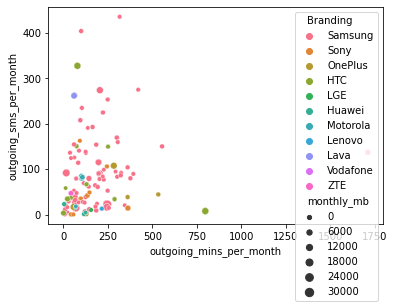

In [47]:
sns.scatterplot(
    x='outgoing_mins_per_month',
    y='outgoing_sms_per_month',
    size = 'monthly_mb',

    hue='Branding',
    data=dfKetQua
)
plt.show()

11.  Hãy kiểm định xem trung bình outgoing_mins_per_month có bằng 200 phút

In [48]:
dfKetQua['outgoing_mins_per_month']

0       21.97
1       69.80
2      249.26
3      249.26
4       83.46
        ...  
196     22.85
197    180.18
198     12.85
199     42.75
200     42.75
Name: outgoing_mins_per_month, Length: 201, dtype: float64

In [49]:
from statsmodels.stats.weightstats import ztest as ztest
# One sample Z test
ztest(dfKetQua['outgoing_mins_per_month'], value=200)
# do p_value = 0.42193 > alpha : 0.05 ->  Du dieu kien noi outgoing_mins_per_month có bằng 200 phút

(0.3678324474067914, 0.7129981730830808)

12.  Hãy kiểm định xem trung bình outgoing_sms_per_month có bằng 100 tin nhắn

In [50]:
dfKetQua['outgoing_sms_per_month']

0        4.82
1       14.70
2      253.22
3      253.22
4      114.06
        ...  
196     34.54
197     17.49
198     58.32
199     46.83
200     46.83
Name: outgoing_sms_per_month, Length: 201, dtype: float64

In [51]:
from statsmodels.stats.weightstats import ztest as ztest

ztest(dfKetQua['outgoing_sms_per_month'], value=100)
# p_value = 6.898e-106 < 0.05 --> Khong du dieu kien noi 

(-2.956708578196125, 0.003109418467062032)

##### p.value = 0.003 < 0.05 ==> bác bỏ trung bình outgoing_sms_per_month có bằng 100 tin nhắn

13.  Hãy kiểm định xem trung bình monthly_mb có bằng 2048 mb

In [52]:
dfKetQua['monthly_mb']

0       1557.33
1      25955.55
2       1557.33
3       1557.33
4       3114.67
         ...   
196     6577.12
197     2076.45
198       74.40
199     5191.12
200     5191.12
Name: monthly_mb, Length: 201, dtype: float64

In [53]:
from statsmodels.stats.weightstats import ztest as ztest

ztest(dfKetQua['monthly_mb'], value=2048)
# p_value = 6.898e-106 < 0.05 --> Khong du dieu kien noi 
# p_value =  5.271784083386454e-12 < 0.05 --> Khong du dieu kien de noi monthly_mb bang 2048mb
# p.value = 3.257 > 0.05 ==> không bác bỏ trung bình monthly_mb có bằng 2048 mb

(5.918078326415771, 3.257248511198895e-09)

14.  Hãy tạo ma trận tương quan giữa [outgoing_mins_per_month, outgoing_sms_per_month, 
monthly_mb] và sắp xếp tăng dần về mức độ tương quan

In [54]:
import pandas as pd

# Giả sử df là DataFrame có các cột outgoing_mins_per_month, outgoing_sms_per_month, monthly_mb

# Tính ma trận tương quan giữa các cột
corr_matrix = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb']].corr()

# Chuyển ma trận tương quan thành DataFrame và bỏ đi các giá trị trùng lặp
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Lọc bỏ các giá trị trùng lặp và tự tương quan (giá trị với chính nó)
corr_pairs = corr_pairs[corr_pairs['Feature1'] != corr_pairs['Feature2']].drop_duplicates()

# Sắp xếp giá trị tương quan theo thứ tự tăng dần
sorted_corr = corr_pairs.sort_values(by='Correlation')

# Hiển thị kết quả
print(sorted_corr)


                  Feature1                 Feature2  Correlation
5   outgoing_sms_per_month               monthly_mb    -0.046049
7               monthly_mb   outgoing_sms_per_month    -0.046049
1  outgoing_mins_per_month   outgoing_sms_per_month    -0.016494
3   outgoing_sms_per_month  outgoing_mins_per_month    -0.016494
2  outgoing_mins_per_month               monthly_mb     0.213489
6               monthly_mb  outgoing_mins_per_month     0.213489


In [55]:
from scipy.stats.stats import pearsonr
pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])

(-0.016494441685319394, 0.8162223636414832)

15.  Kiểm định xem outgoing_mins_per_month, outgoing_sms_per_month có tương quan

In [56]:

from scipy.stats.stats import pearsonr

pearsonr(dfKetQua['outgoing_mins_per_month'], dfKetQua['outgoing_sms_per_month'])
# p_value = 0.816 > alpha = 0.05:
# Accpect: Du dieu kien de chung tuong quan
#p.value = 0.816 > 0.05 ==> không đủ điền kiện kế luận outgoing_mins_per_month và outgoing_sms_per_month tương quan

(-0.016494441685319394, 0.8162223636414832)

16.  Hãy kiểm định xem có mối quan hệ nào giữa platform và branding

In [57]:
crosdata = pd.crosstab(dfKetQua['platform'], [dfKetQua['Branding']], rownames=['platform'], colnames=['Branding'])
crosdata

Branding,HTC,Huawei,LGE,Lava,Lenovo,Motorola,OnePlus,Samsung,Sony,Vodafone,ZTE
platform,,,,,,,,,,,
android,44,3,2,2,2,16,6,108,16,1,1


In [58]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
   

p value is 1.0
Independent (H0 holds true)


In [59]:
# M1 va  M2 co tuong quan hay khong 
import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('platform ~ Branding', data=dfKetQua).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table
# Do p_value = 2.511138e-37 < alpha = 0.05 --> Khong du dieu kien de noi platform phu thuoc vao Branding

,df,sum_sq,mean_sq,F,PR(>F)
Branding,10.0,1.454488e-28,1.454488e-29,7.99358,1.041081e-10
Residual,190.0,3.457183e-28,1.819570e-30,NaN,NaN


In [ ]:
##### Kết luận
# - p.value = 1.0 > 0.05
# - đủ dữ kiện để nói rằng platform không phụ thuộc với Branding 

17.  Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform

In [60]:
# monthly_mb va  platform co tuong quan hay khong 
import statsmodels.api as sm

from statsmodels.formula.api import ols

model = ols('platform ~ monthly_mb', data=dfKetQua).fit()
a = sm.stats.anova_lm(model, typ=1)
a
# Do p_value = 0.000003 < alpha = 0.05 --> reject


,df,sum_sq,mean_sq,F,PR(>F)
monthly_mb,1.0,5.009344e-31,5.009344e-31,36.104841,8.769567e-09
Residual,199.0,2.761013e-30,1.387444e-32,NaN,NaN


In [61]:
crosdata = pd.crosstab(dfKetQua['monthly_mb'], [dfKetQua['platform']], rownames=['monthly_mb'], colnames=['platform'])
crosdata

platform,android
monthly_mb,
0.00,1
11.68,1
33.79,2
74.40,1
212.64,4
407.01,1
519.12,30
803.24,1
894.58,2


In [62]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(crosdata)
 
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


In [63]:
dfKetQua['platform']

0      android
1      android
2      android
3      android
4      android
        ...   
196    android
197    android
198    android
199    android
200    android
Name: platform, Length: 201, dtype: object

##### Kết luận
- p.value = 1.0 > 0.05
- đủ dữ kiện để nói rằng monthly_mb không phụ thuộc với platform

18.  Hãy kiểm định xem có mối quan hệ nào giữa monthly_mb và platform theo loại branding

In [64]:

model = ols(' monthly_mb ~ Branding + platform + Branding:platform',data=dfKetQua).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)
# p_value > alpha : --> doc lap

                      df        sum_sq       mean_sq         F    PR(>F)
Branding            10.0  2.792153e+08  2.792153e+07  0.974799  0.466796
platform             0.0  0.000000e+00           NaN       NaN       NaN
Branding:platform    0.0  0.000000e+00           NaN       NaN       NaN
Residual           190.0  5.442239e+09  2.864336e+07       NaN       NaN


In [ ]:
# ##### Kết luận
# - Đủ dữ kiện để nói branding và platform không phụ thuộc với nhau với mức tin cậy 95%
# - Đủ dữ kiện để nói monthly_mb và platform không phụ thuộc với nhau với mức tin cậy 95%
# - Đủ dữ kiện để nói platform không phụ thuộc với monthly_mb theo từng loại branding với mức tin cậy 95%

19.  Phân tích sự ảnh hưởng của outgoing_mins_per_month, outgoing_sms_per_month đến 
monthly_mb dựa trên mô hình hồi quy tuyến tính

In [65]:
import statsmodels.api as sm
X_with_constant = sm.add_constant(dfKetQua[["outgoing_mins_per_month","outgoing_sms_per_month"]].values)
y = dfKetQua[['monthly_mb']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
a =   5.2006 +  0.0161  * 6  + ( -0.0906 ) * 5
print(f'Ket qua neu van muon lam =  {a}')
# monthly_mb = a 
# outgoing_mins_per_month = b
# outgoing_sms_per_month = c
# a = f(b, c)
# a =  a0 + a1 * b + a2 * c
# a = 3384.4448 + 6.0640 * b - 9.4387 * c

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.925
Date:                Sat, 11 Jan 2025   Prob (F-statistic):            0.00818
Time:                        07:24:58   Log-Likelihood:                -2005.3
No. Observations:                 201   AIC:                             4017.
Df Residuals:                     198   BIC:                             4027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3513.0441    631.350      5.564      0.0

20. Dựa trên mô hình hồi quy tuyến tính hãy cho biết nếu outgoing_mins_per_month, 
outgoing_sms_per_month lần lượt là 50 phút, 75 tin nhắn thì tháng đó người dùng sẽ tiêu 
hao bao nhiêu dung lượng internet (mb) cho quá trình sử dụng. 
(*) Lưu ý: Sinh viên xây dựng chương trình phần mềm hoàn chỉnh dạng Console 
Application với Input là outgoing_mins_per_month, outgoing_sms_per_month và output 
là giá trị monthly_mb dự báo được.

In [66]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Giả sử dữ liệu của bạn đã được lưu trong DataFrame 'df'
# df chứa các cột: 'outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb'
# Nếu bạn có sẵn dữ liệu trong df, chỉ cần dùng nó trực tiếp

# Huấn luyện mô hình hồi quy tuyến tính với dữ liệu thực tế
X = dfKetQua[['outgoing_mins_per_month', 'outgoing_sms_per_month']]  # Biến độc lập
y = dfKetQua['monthly_mb']  # Biến phụ thuộc

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Định nghĩa hàm dự đoán dựa trên mô hình đã huấn luyện
def predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month):
    return model.predict([[outgoing_mins_per_month, outgoing_sms_per_month]])[0]

# Chương trình Console Application
def main():
    print("Chương trình dự đoán lượng dữ liệu internet tiêu thụ hàng tháng")

    # Nhập dữ liệu từ người dùng
    outgoing_mins_per_month = 50
    outgoing_sms_per_month = 70

    # Dự đoán lượng dữ liệu tiêu thụ
    predicted_mb = predict_monthly_mb(outgoing_mins_per_month, outgoing_sms_per_month)

    # Hiển thị kết quả dự đoán
    print(f"Dự đoán lượng dữ liệu internet tiêu thụ: {predicted_mb:.2f} MB")

if __name__ == "__main__":
    main()

Chương trình dự đoán lượng dữ liệu internet tiêu thụ hàng tháng
Dự đoán lượng dữ liệu internet tiêu thụ: 3557.45 MB
